# Week 8 Videos

## Downloading the MNIST dataset of handwritten digits

<iframe width="560" height="315" src="https://www.youtube.com/embed/s9X9fdUmS0s" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

![Handwritten 5](../images/mnist.png)

Source: [medium.com](https://medium.com/comet-ml/real-time-numbers-recognition-mnist-on-an-iphone-with-coreml-from-a-to-z-283161441f90)

* Find the dataset name on [openml.org](https://www.openml.org/) and load it into the notebook using the `fetch_openml` function from scikit-learn's `datasets` module.  (**Warning**.  I tried loading this dataset twice and ran out of memory, so only run the code once.)

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
type(mnist)

sklearn.utils.Bunch

In [4]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [5]:
dfX = mnist.data

In [6]:
type(dfX)

pandas.core.frame.DataFrame

In [7]:
dfX.shape

(70000, 784)

In [8]:
dfX.iloc[4]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 4, Length: 784, dtype: float64

In [9]:
arr = dfX.iloc[4].to_numpy()

In [10]:
arr.shape

(784,)

In [11]:
arr2d = arr.reshape((28,28))

In [12]:
arr2d.shape

(28, 28)

In [13]:
import matplotlib.pyplot as plt

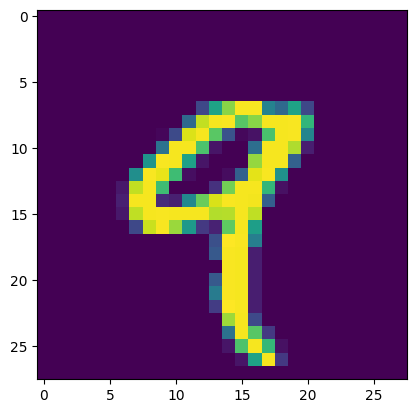

In [14]:
fig, ax = plt.subplots()
ax.imshow(arr2d)

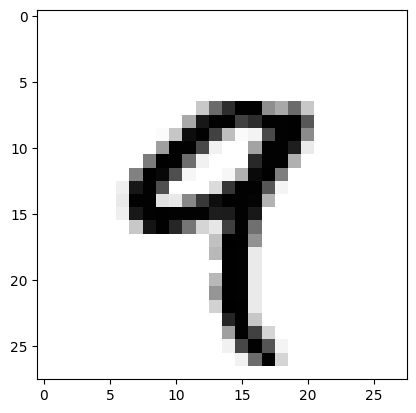

In [15]:
fig, ax = plt.subplots()
ax.imshow(arr2d, cmap='binary')

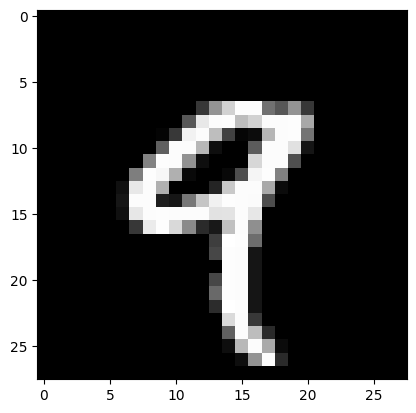

In [16]:
fig, ax = plt.subplots()
ax.imshow(arr2d, cmap='binary_r')

In [17]:
y = mnist.target

In [18]:
type(y)

pandas.core.series.Series

In [19]:
y.iloc[4]

'9'


* Divide the data into a training set and a test set, using 90% of the samples for the training set.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(dfX, y, train_size=0.9)

In [22]:
X_train.shape

(63000, 784)

In [23]:
y_train.shape

(63000,)

In [24]:
X_test.shape

(7000, 784)

## Bad idea: Using linear regression with MNIST

<iframe width="560" height="315" src="https://www.youtube.com/embed/ufc7TwFYxhY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [31]:
from sklearn.linear_model import LinearRegression

In [58]:
reg = LinearRegression()

In [59]:
reg.fit(X_train, y_train)

LinearRegression()

In [60]:
reg.predict(X_train)

array([1.57972661, 3.96426198, 4.30633978, ..., 2.12751007, 5.70961828,
       4.17563757])

In [61]:
z = reg.predict(X_train).round()

In [62]:
z

array([2., 4., 4., ..., 2., 6., 4.])

In [63]:
y_train

35538    1
34065    5
44649    6
39015    5
56381    7
        ..
29040    1
57941    3
26295    1
56550    4
54603    3
Name: class, Length: 63000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [64]:
y_train == 1

35538    False
34065    False
44649    False
39015    False
56381    False
         ...  
29040    False
57941    False
26295    False
56550    False
54603    False
Name: class, Length: 63000, dtype: bool

In [65]:
y_train == '1'

35538     True
34065    False
44649    False
39015    False
56381    False
         ...  
29040     True
57941    False
26295     True
56550    False
54603    False
Name: class, Length: 63000, dtype: bool

In [66]:
y2 = y_train.astype(int)

In [67]:
y2 == 1

35538     True
34065    False
44649    False
39015    False
56381    False
         ...  
29040     True
57941    False
26295     True
56550    False
54603    False
Name: class, Length: 63000, dtype: bool

In [68]:
y2 == z

35538    False
34065    False
44649    False
39015    False
56381    False
         ...  
29040     True
57941    False
26295    False
56550    False
54603    False
Name: class, Length: 63000, dtype: bool

In [69]:
(y2 == z).mean()

0.22885714285714287

## Using a decision tree with MNIST

<iframe width="560" height="315" src="https://www.youtube.com/embed/TOFFhHO_NNk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
clf = DecisionTreeClassifier()

In [72]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
z = clf.predict(X_train)

In [74]:
z

array(['1', '5', '6', ..., '1', '4', '3'], dtype=object)

In [76]:
(z == y_train).mean()

1.0

In [77]:
z2 = clf.predict(X_test)

In [78]:
(z2 == y_test).mean()

0.8792857142857143

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d9849fdc-63d6-465a-a706-7821a3cb4d78' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>